# How Does A State's Education Ranking Relate to its Unemployment and Cost of Living Rankings?
### Does education on its own improve quality of life?
###### By SreeKeerthi ManurSreekantaMurthyGari


In [35]:
import requests
from bs4 import BeautifulSoup as bs
import numpy as np
import pandas as pd
import json
from collections import defaultdict
import matplotlib.pyplot as plt

In [ ]:
data1 = pd.read_json('CostJsonData.json')

df1 = data1.head(n=50)

df1.drop(["groceryCost", "housingCost", "utilitiesCost", "transportationCost", "miscCost"], axis=1, inplace=True)
df1.rename(columns = {'state':'State'}, inplace = True)
df1.rename(columns = {'costIndex':'Cost To Live Index'}, inplace = True)

print(df1)

In [ ]:
data2 = pd.read_json('UnemJsonData.json')

df_2 = data2.head(n=50)

df_2.drop(["rate21"], axis=1, inplace=True)
df_2.rename(columns = {'state':'State'}, inplace = True)
df_2.rename(columns = {'rate22':'Unemployment Rate'}, inplace = True)

df2 = df_2.reindex([31, 7, 10, 19, 17, 26, 9, 8, 36, 12, 24, 49, 42, 39, 40, 30, 33, 22, 1, 45, 21, 27, 20, 5, 3, 0, 13, 14, 6, 16, 11, 43, 23, 25, 46, 44, 2, 35, 18, 34, 4, 15, 32, 38, 48, 29, 28, 37, 47, 41])

output1 = pd.merge(df1, df2, how='inner')

print(output1)

In [ ]:
data3 = pd.read_json('EducJsonData.json')

df_3 = data3.head(n=50)

df_3.drop(["higherEducationRank"], axis=1, inplace=True)
df_3.drop(["prek12Rank"], axis=1, inplace=True)
df_3.rename(columns = {'state':'State'}, inplace = True)
df_3.rename(columns = {'overallRank':'Education Rank'}, inplace = True)

df3 = df_3.reindex([42, 22, 46, 41, 25, 32, 29, 17, 44, 21, 40, 49, 37, 30, 33, 47, 35, 43, 8, 10, 20, 6, 7, 24, 9, 16, 2, 31, 18, 11, 28, 36, 45, 4, 39, 23, 12, 3, 27, 0, 14, 38, 5, 13, 48, 34, 1, 19, 15, 26])

#print(df3)

finalset = pd.merge(output1, df3, how='inner')

print(finalset)

In [28]:
finalset.to_csv("CleanedSet.csv")

In [30]:
rankings = pd.read_csv("CleanedSet.csv")

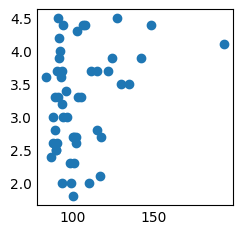

In [36]:
plt.scatter(rankings['Cost To Live Index'], rankings['Unemployment Rate'])

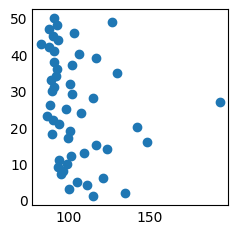

In [37]:
plt.scatter(rankings['Cost To Live Index'], rankings['Education Rank'])

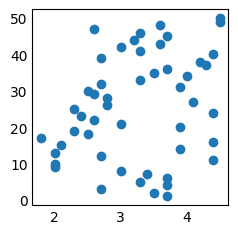

In [38]:
plt.scatter(rankings['Unemployment Rate'], rankings['Education Rank'])

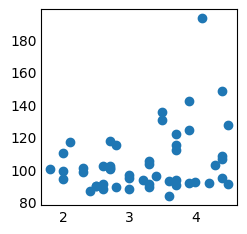

In [39]:
plt.scatter(rankings['Unemployment Rate'], rankings['Cost To Live Index'])

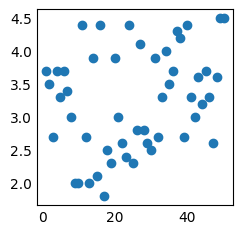

In [40]:
plt.scatter(rankings['Education Rank'], rankings['Unemployment Rate'])

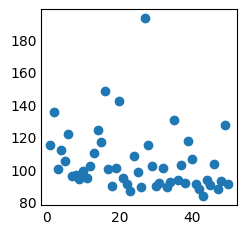

In [41]:
plt.scatter(rankings['Education Rank'], rankings['Cost To Live Index'])